In [1]:
import matplotlib.pyplot as plt
import numpy as np
import keras.backend as K
from keras.initializers import Initializer
from packages.Utility.Gabor import gaborFilter

Using TensorFlow backend.


In [2]:
class GaborFilterBanks(Initializer):

    def __init__(self, gabor_params, normalize = False):
        self.gabor_params = gabor_params
        self.normalize = normalize
        
    def getFilterBanks(self, shape):
        all_kernels = []
    
        # Membuat sejumlah kernel yang diinginkan
        for i in range(shape[3]):
            kernels = []
    
            # Membuat sejumlah channel
            for j in range(shape[2]):
                lambd, theta, psi, sigma, gamma = self.gabor_params.getParams(shape, i, j)
                
                gabor = gaborFilter(
                        size = (shape[0], shape[1]), 
                        sigma = sigma,
                        theta = theta,
                        lambd = lambd,
                        gamma = gamma,
                        psi = psi
                    )
                
                if self.normalize:
                    gabor /= np.linalg.norm(gabor)
                    
                kernels.append(gabor)
                
            all_kernels.append(np.array(kernels))
        
        all_kernels = np.array(all_kernels).T
        
        return all_kernels

    def __call__(self, shape, dtype = None):
        all_kernels = self.getFilterBanks(shape)
        
        kernel = K.variable(all_kernels, dtype = dtype)

        return kernel

In [6]:
class GaborParams():
    
    def __init__(self, sigma = -1, lambd = -1, gamma = -1, psi = -1, theta = (-1, -1)):
        self.theta = theta
        self.sigma = sigma
        self.lambd = lambd
        self.gamma = gamma
        self.psi = psi
    
    def getParams(self, shape, i, j):
        self.i = i + 1
        self.j = j + 1
        self.shape = shape
        
        theta = self.hitungTheta() * np.pi / 180
        sigma = self.hitungSigma()
        lambd = self.hitungLambda()
        gamma = self.hitungGamma()
        psi = self.hitungPsi()
        
        return lambd, theta, psi, sigma, gamma
    
    def hitungTheta(self):
        start = (360 / self.shape[2]) if self.theta[0] is -1 else self.theta[0]
        end = (360 - (360 / self.shape[2])) if self.theta[1] is -1 else self.theta[1]
        
        rangeTheta = np.linspace(start, end, self.shape[3])
        
        return rangeTheta[self.i - 1]
    
    def hitungSigma(self):
        start = (self.i + 1) if self.sigma is -1 else self.sigma[0]
        end = (self.i + self.j) if self.sigma is -1 else self.sigma[1]
        
        rangeSigma = np.linspace(start, end, self.shape[2])
        
        return rangeSigma[self.j - 1]
    
    def hitungLambda(self):
        start = ((self.i + 1) / self.shape[2]) if self.lambd is -1 else self.lambd[0]
        end = (self.i * self.j / self.shape[2]) if self.lambd is -1 else self.lambd[1]
        
        rangeLambd = np.linspace(start, end, self.shape[2])
        
        return rangeLambd[self.j - 1]
    
    def hitungGamma(self):
        start = ((self.i + 1) / self.shape[2]) if self.gamma is -1 else self.gamma[0]
        end = ((self.i + self.j) / self.shape[2]) if self.gamma is -1 else self.gamma[1]
        
        rangeGamma = np.linspace(start, end, self.shape[2])
        
        return rangeGamma[self.j - 1]
    
    def hitungPsi(self):
        start = (self.i + 1) if self.psi is -1 else self.psi[0]
        end = (self.i + self.j) if self.psi is -1 else self.psi[1]
        
        rangePsi = np.linspace(start, end, self.shape[2])
        
        return rangePsi[self.j - 1]
    

In [11]:
shape = (11, 11, 10, 16)

banks1 = GaborFilterBanks(GaborParams(), normalize = False)
filters1 = banks1.getFilterBanks(shape)

banks2 = GaborFilterBanks(GaborParams(theta = (30, 360), sigma = (1, 10), lambd = (5, 20), gamma = (0.25, 2)), normalize = True)
filters2 = banks2.getFilterBanks(shape)

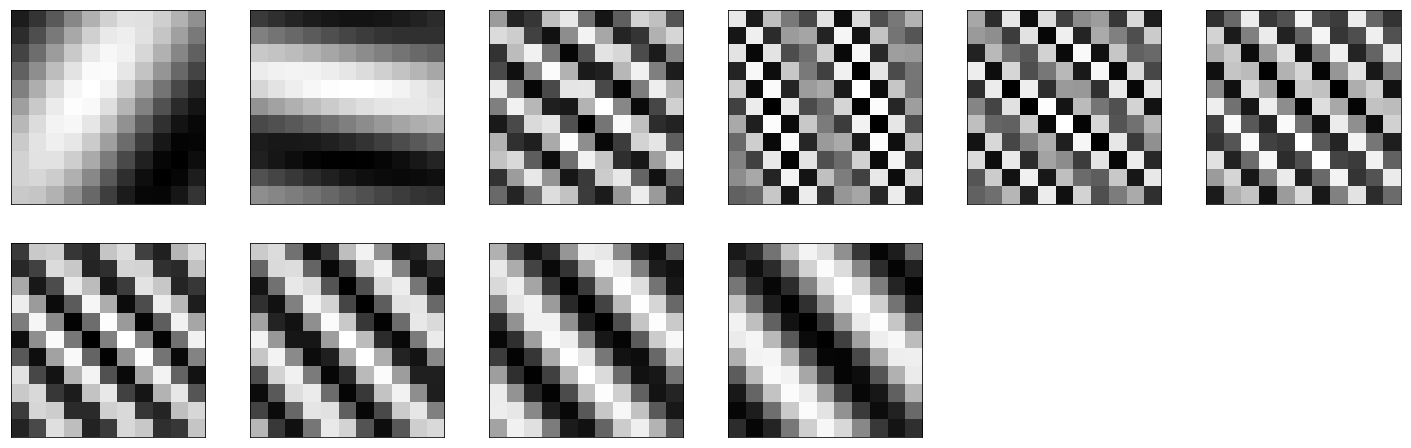

In [12]:
fig = plt.figure(figsize = (25, 25))

for i in range(shape[2]):
    y = plt.subplot(6, 6, i + 1)
    y.imshow(filters1[:, :, i, 5], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

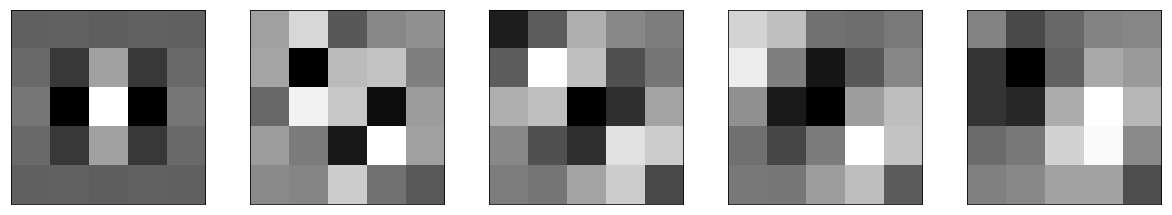

In [28]:
fig = plt.figure(figsize = (25, 25))

for i in range(shape[2]):
    y = plt.subplot(6, 6, i + 1)
    y.imshow(filters2[:, :, i, 0], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [17]:
filters2[:, :, 0, 2]

array([[-0.00134406,  0.00602368, -0.00993137,  0.00602368, -0.00134406],
       [ 0.03565477, -0.1597936 ,  0.26345511, -0.1597936 ,  0.03565477],
       [ 0.08824809, -0.3955005 ,  0.65207009, -0.3955005 ,  0.08824809],
       [ 0.03565477, -0.1597936 ,  0.26345511, -0.1597936 ,  0.03565477],
       [-0.00134406,  0.00602368, -0.00993137,  0.00602368, -0.00134406]])